<a href="https://colab.research.google.com/github/Shakhwat-hossain/CVPR/blob/master/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print('Training data shape:',X_train.shape)
print('Training labels shape:',y_train.shape)
print('Test data shape:',X_test.shape)
print('Test labels shape:',y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


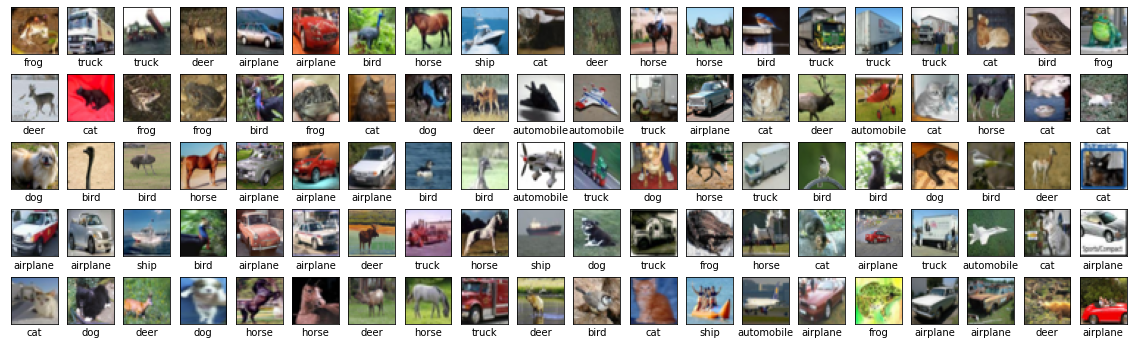

In [4]:
classes=['automobile','airplane',  'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

R = 5
C = 20
i = 0

plt.figure(figsize=(20,6))
for i in range (100):
        plt.subplot(R,C,i+1)
        plt.imshow(X_train[i])
       
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(classes[ y_train[i][0] ])
        i += 1

In [9]:
X_train_reshaped = X_train.reshape(-1,32*32*3).astype('float32')/255
print(f"train img reshape{X_train_reshaped.shape}")
# print(X_train[0].shape)

train img reshape(50000, 3072)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=3072),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),

])

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [20]:
h = model.fit(x=X_train_reshaped, y= y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6700 - accuracy: 0.4023 - val_loss: 1.6681 - val_accuracy: 0.4070
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6419 - accuracy: 0.4148 - val_loss: 1.7173 - val_accuracy: 0.3942
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6229 - accuracy: 0.4194 - val_loss: 1.6752 - val_accuracy: 0.4055
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6054 - accuracy: 0.4252 - val_loss: 1.6393 - val_accuracy: 0.4207
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5926 - accuracy: 0.4284 - val_loss: 1.7746 - val_accuracy: 0.3706
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5809 - accuracy: 0.4372 - val_loss: 1.6169 - val_accuracy: 0.4287
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5718 - accuracy: 0.4397 - val_loss: 1.6305 - val_accuracy:

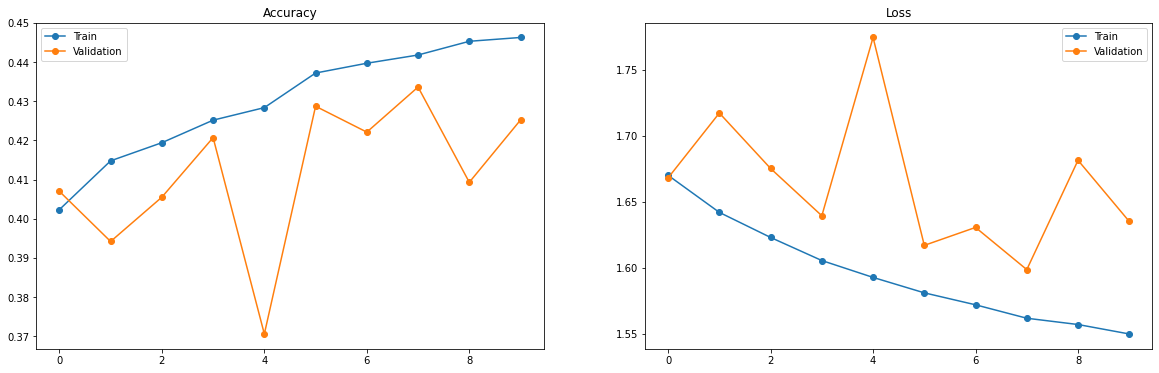

In [21]:
# print(h.keys())
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')
plt.legend(['Train', 'Validation'])
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '-o')
plt.plot(h.history['val_loss'], '-o')
plt.legend(['Train', 'Validation'])
plt.title('Loss')
plt.show()

In [23]:
#Utility Function
def getL2DistanceMatrix(train,test):
  num_test = test.shape[0]
  num_train = train.shape[0]
  L2_dists = np.zeros((num_test, num_train))
  # L1_dists = np.zeros((num_test, num_train))
  for i in range(num_test):
    # L1_dists[i, :] = np.sum(np.square(X_test[i] - X_train), axis=1)
    L2_dists[i, :] = np.sqrt(np.sum(np.square(X_test[i] - X_train), axis=1))
  return L2_dists

def predict(distance, k=1):
  num_test = distance.shape
  y_pred = np.zeros(num_test)
  for i in range(num_test):
    closest_y = []
    closest_y = np.take(y_train, np.argsort(distance[i]))[:k]
    (values, counts) = np.unique(closest_y, return_counts=True)
    y_pred[i] = values[np.argmax(counts)]

    return y_pred

In [38]:
#L1 & L2 Distance:

num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

num_test = X_test.shape[0]
num_train = X_train.shape[0]
L2_dists = np.zeros((num_test, num_train))
L1_dists = np.zeros((num_test, num_train))
for i in range(num_test):
    L1_dists[i, :] = np.sum(np.square(X_test[i] - X_train), axis=1)
    L2_dists[i, :] = np.sqrt(np.sum(np.square(X_test[i] - X_train), axis=1))

print("L1 Matrix:",L1_dists)
print("L2 Matrix:",L2_dists)

(5000, 3072) (500, 3072)
L1 Matrix: [[320202. 322911. 329559. ... 318775. 328690. 326376.]
 [323653. 328556. 345940. ... 321170. 332665. 330365.]
 [324224. 322045. 327531. ... 323683. 318426. 319236.]
 ...
 [335259. 322262. 320402. ... 325350. 326027. 326029.]
 [321336. 323477. 317605. ... 334015. 324710. 323762.]
 [319813. 315252. 327596. ... 328426. 330491. 332633.]]
L2 Matrix: [[565.86394124 568.25258468 574.0722951  ... 564.60162947 573.31492219
  571.2932697 ]
 [568.90508875 573.19804605 588.16664305 ... 566.71862507 576.77118513
  574.77386858]
 [569.40670878 567.49008802 572.3032413  ... 568.93145457 564.29247736
  565.00973443]
 ...
 [579.01554383 567.68124859 566.04063458 ... 570.39460025 570.98774067
  570.98949202]
 [566.86506331 568.75038462 563.56454821 ... 577.94030834 569.83330896
  569.00087873]
 [565.52011458 561.47306258 572.36002656 ... 573.08463598 574.88346645
  576.74344383]]


In [39]:
#Cross Validation
kfold = KFold(n_splits=5, shuffle = True,random_state= 1)
for train, test in kfold.split(X_train):
		print('train: %s, test: %s' % (X_train, X_test))

train: [[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [167 163 145 ...  42  78  84]
 [154 152 125 ... 194 247 114]
 [ 45  32  21 ... 156 142 100]], test: [[158 112  49 ...  21  67 110]
 [235 235 235 ... 186 200 199]
 [158 190 222 ...   7   8   7]
 ...
 [ 74 126 176 ... 141 199 251]
 [145 162 125 ... 117 119 105]
 [185 189 188 ... 211 212 206]]
train: [[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [167 163 145 ...  42  78  84]
 [154 152 125 ... 194 247 114]
 [ 45  32  21 ... 156 142 100]], test: [[158 112  49 ...  21  67 110]
 [235 235 235 ... 186 200 199]
 [158 190 222 ...   7   8   7]
 ...
 [ 74 126 176 ... 141 199 251]
 [145 162 125 ... 117 119 105]
 [185 189 188 ... 211 212 206]]
train: [[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [167 163 145 ...  42  78  84]
 [154 152 125 ... 194 247 114]
 [ 45  32  21 ... 156 142 100]], test